In [1]:
from pyvi import ViTokenizer  # thư viện NLP tiếng Việt
import numpy as np
import pandas as pd
import gensim  # thư viện NLP
import os
from timing import timing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import pickle

from tqdm.notebook import tqdm, trange
tqdm.pandas(desc='Processing Dataframe')

import sklearn

%matplotlib inline

# Prepare data and preprocess

In [2]:
with open('vietnamese-stopwords-dash.txt') as f:
    stop_words = f.readlines()
    stop_words = [word.replace('\n', '') for word in stop_words]

# print(stop_words)


def clean_text(text, stop_words=None):
    lines = gensim.utils.simple_preprocess(text)
    lines = ' '.join(lines)
    lines = ViTokenizer.tokenize(lines)

    if stop_words:
        words = []
        for word in lines.split(' '):
            if word not in stop_words:
                words.append(word)

        return ' '.join(words)
    else:
        return lines

In [3]:
clean_text('cho tới khi việt nam triển khai thành công vacine phòng ngừa covid 19 cho đi toàn dân')

'cho tới khi việt nam triển_khai thành_công vacine phòng_ngừa covid cho đi toàn dân'

In [4]:
clean_text('buổi làm', stop_words)

''

## Data 1

In [5]:
data_path = '/home/long/Downloads/VNTC/Data'


def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for i in trange(len(dirs), desc='Category'):
        path = dirs[i]
        file_paths = os.listdir(os.path.join(folder_path, path))
        for j in trange(len(file_paths), desc=path):
            file_path = file_paths[j]
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-16") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                lines = clean_text(lines, stop_words)
                X.append(lines)
                y.append(path)

    print('===========complete============')
    return X, y

In [ ]:
train_path = os.path.join(data_path, '10Topics/Ver1.1/Train_Full')
X_data, y_data = get_data(train_path)

pickle.dump(X_data, open('data/X_data2.pkl', 'wb'))
pickle.dump(y_data, open('data/y_data2.pkl', 'wb'))

Category:   0%|          | 0/10 [00:00<?, ?it/s]

Van hoa:   0%|          | 0/3080 [00:00<?, ?it/s]

In [ ]:
test_path = os.path.join(data_path, '10Topics/Ver1.1/Test_Full')
X_test, y_test = get_data(test_path)

pickle.dump(X_test, open('data/X_test2.pkl', 'wb'))
pickle.dump(y_test, open('data/y_test2.pkl', 'wb'))

In [70]:
df_train = pd.DataFrame({
    'category': y_data,
    'text': X_data
})
categories = df_train['category'].unique()
df_test = pd.DataFrame({
    'category': y_test,
    'text': X_test
})

df_all = pd.concat([df_train, df_test])

/home/long/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chinh tri Xa hoi'),
  Text(1, 0, 'Doi song'),
  Text(2, 0, 'Khoa hoc'),
  Text(3, 0, 'Kinh doanh'),
  Text(4, 0, 'Phap luat'),
  Text(5, 0, 'Suc khoe'),
  Text(6, 0, 'The gioi'),
  Text(7, 0, 'The thao'),
  Text(8, 0, 'Van hoa'),
  Text(9, 0, 'Vi tinh')])

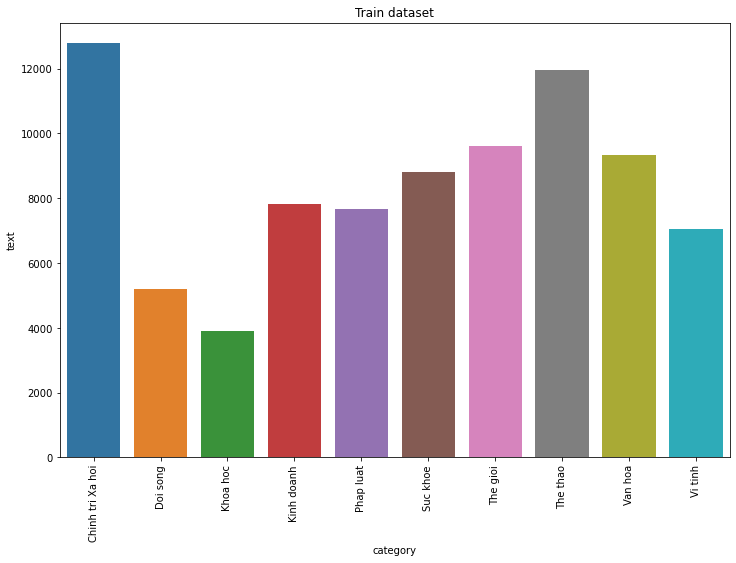

In [7]:
temp = df_all.groupby('category')['text'].count()

plt.figure(figsize=(12, 8))
sns.barplot(temp.index, temp)
plt.title('Train dataset')
plt.xticks(rotation=90)

<Figure size 432x288 with 0 Axes>

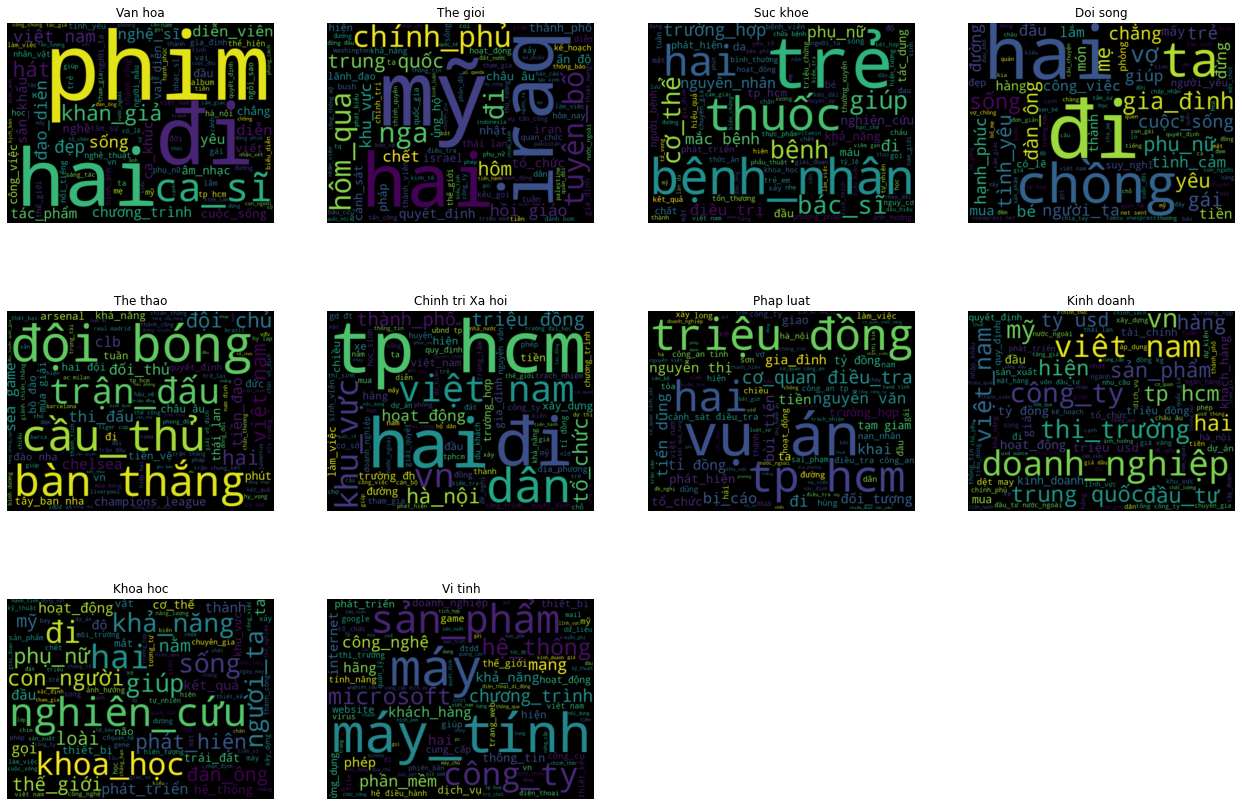

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(22, 15))
wc = WordCloud(max_words=100, width=800, height=600)

for idx, category in enumerate(categories):
    plt.subplot(3, 4, idx + 1)
    wc.generate(" ".join(df_train.loc[df_train.category == category, 'text']))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(category)
    plt.axis("off")
plt.figure()

/home/long/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/long/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chinh tri Xa hoi'),
  Text(1, 0, 'Doi song'),
  Text(2, 0, 'Khoa hoc'),
  Text(3, 0, 'Kinh doanh'),
  Text(4, 0, 'Phap luat'),
  Text(5, 0, 'Suc khoe'),
  Text(6, 0, 'The gioi'),
  Text(7, 0, 'The thao'),
  Text(8, 0, 'Van hoa'),
  Text(9, 0, 'Vi tinh')])

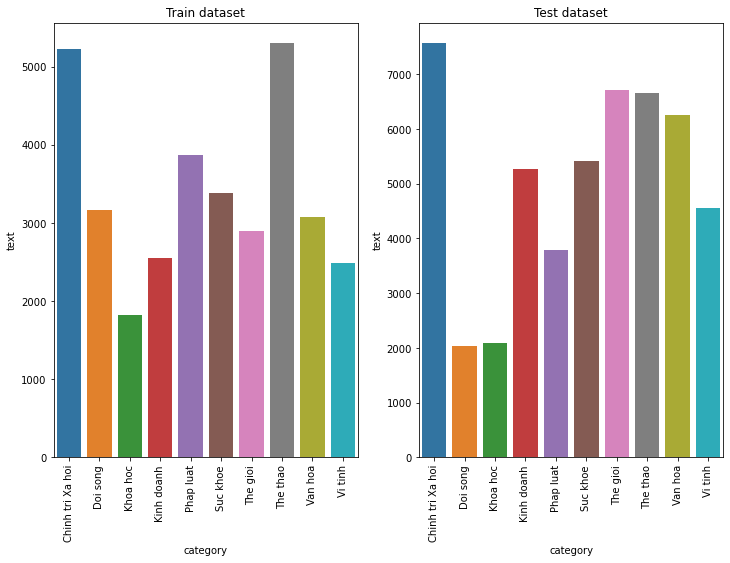

In [9]:
plt.figure(figsize=(12, 8))
temp = df_train.groupby('category')['text'].count()
temp_test = df_test.groupby('category')['text'].count()

plt.subplot(1, 2, 1)
sns.barplot(temp.index, temp)
plt.title('Train dataset')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(temp_test.index, temp_test)
plt.title('Test dataset')
plt.xticks(rotation=90)

In [76]:
lentext = df_train['text'].apply(lambda x: len(x.split()))
lentext.describe()

count    33759.000000
mean       182.427975
std        155.450527
min         10.000000
25%         87.000000
50%        137.000000
75%        232.000000
max       5991.000000
Name: text, dtype: float64

/home/long/anaconda3/envs/ds38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

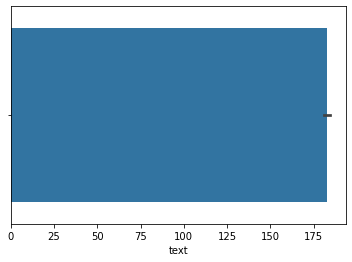

In [77]:
sns.barplot(lentext)

In [10]:
del df_train, df_test

## Data 2

In [21]:
df = pd.read_json("WebCrawling/articles_tuoitre_01012018_12062021.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108346 entries, 0 to 108345
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  105627 non-null  object
 1   text      108346 non-null  object
 2   url       108346 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


In [22]:
# loại bỏ giá trị null
df.drop(df[(df.category.isnull()) | (df.text == '')].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105627 entries, 0 to 108345
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  105627 non-null  object
 1   text      105627 non-null  object
 2   url       105627 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [23]:
df['category'].unique()

array(['Media', 'Văn hóa', 'Thời sự', 'Thế giới', 'Giáo dục', 'Công nghệ',
       'Kinh doanh', 'Khoa học', 'Xe', 'Cuộc sống muôn màu', 'Giải trí',
       'Pháp luật', 'Sức khỏe', 'Thể thao', 'Tin mới nhất',
       'Bạn đọc làm báo', 'Du Lịch', 'Nhịp sống trẻ', 'Giả - Thật',
       'MeKong Xanh', 'Thư giãn', 'Bình Dương', 'Tuổi Trẻ cuối tuần',
       'Nhà đất', 'Người hâm mộ', 'Cần biết', 'SEA Games 30'],
      dtype=object)

In [26]:
selected_categories = ['Thời sự', 'Thế giới', 'Thể thao', 'Kinh doanh', 'Pháp luật',
                       'Giáo dục', 'Sức khỏe', 'Giải trí', 'Văn hóa', 'Khoa học']
df = df[df.category.isin(selected_categories)]
df.loc[(df.category == 'Văn hóa') | (df.category == 'Giải trí'), 'category'] = 'Văn hóa - giải trí'
df.reset_index(drop=True, inplace=True)
df.groupby('category')['text'].count().sort_values(ascending=False)

category
Thời sự               17349
Thế giới              15574
Thể thao              12327
Kinh doanh            11450
Pháp luật             11266
Văn hóa - giải trí    10675
Giáo dục               9032
Sức khỏe               8788
Khoa học               3537
Name: text, dtype: int64

In [ ]:
df['text'] = df['text'].progress_apply(clean_text, None)
df['text'] = df['text'].apply(lambda s: s.replace('tto', '').strip())

df['text']

In [ ]:
df.to_csv('data/data2_keep_stopwords.csv', index=False)
df

category
Thời sự       17349
Thế giới      15574
Thể thao      12327
Kinh doanh    11450
Pháp luật     11266
Giáo dục       9032
Sức khỏe       8788
Giải trí       5521
Văn hóa        5154
Khoa học       3537
Name: text, dtype: int64


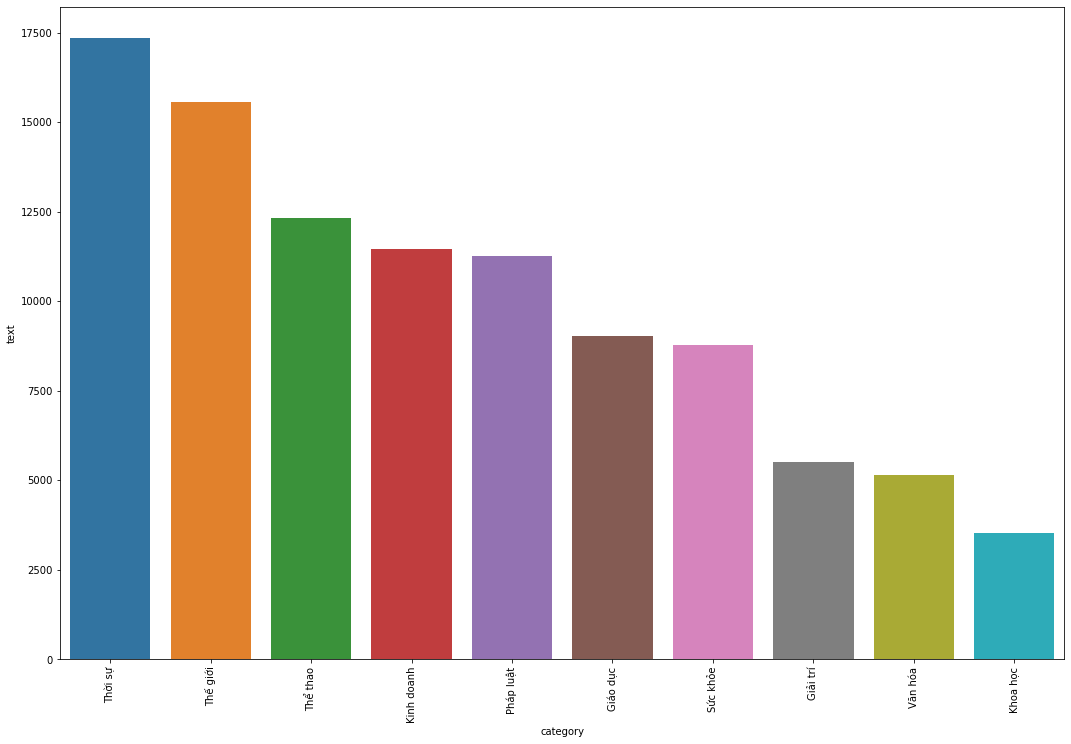

In [25]:
category_count = df.groupby('category')['text'].count().sort_values(ascending=False)
print(category_count)
plt.figure(figsize=(18, 12))
sns.barplot(x=category_count.index, y=category_count)
plt.xticks(rotation=90)
plt.show()

In [33]:
lentext_count = df['text'].apply(lambda x: len(x.split()))
lentext_count.describe()

count    99998.000000
mean       537.224724
std        308.518014
min         10.000000
25%        336.000000
50%        463.000000
75%        668.000000
max       8859.000000
Name: text, dtype: float64

/home/long/anaconda3/envs/ds38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

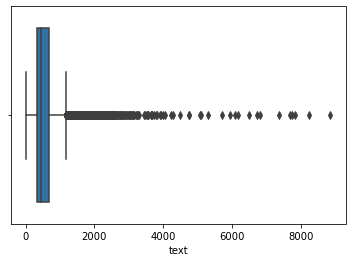

In [34]:
sns.boxplot(lentext_count)

<Figure size 432x288 with 0 Axes>

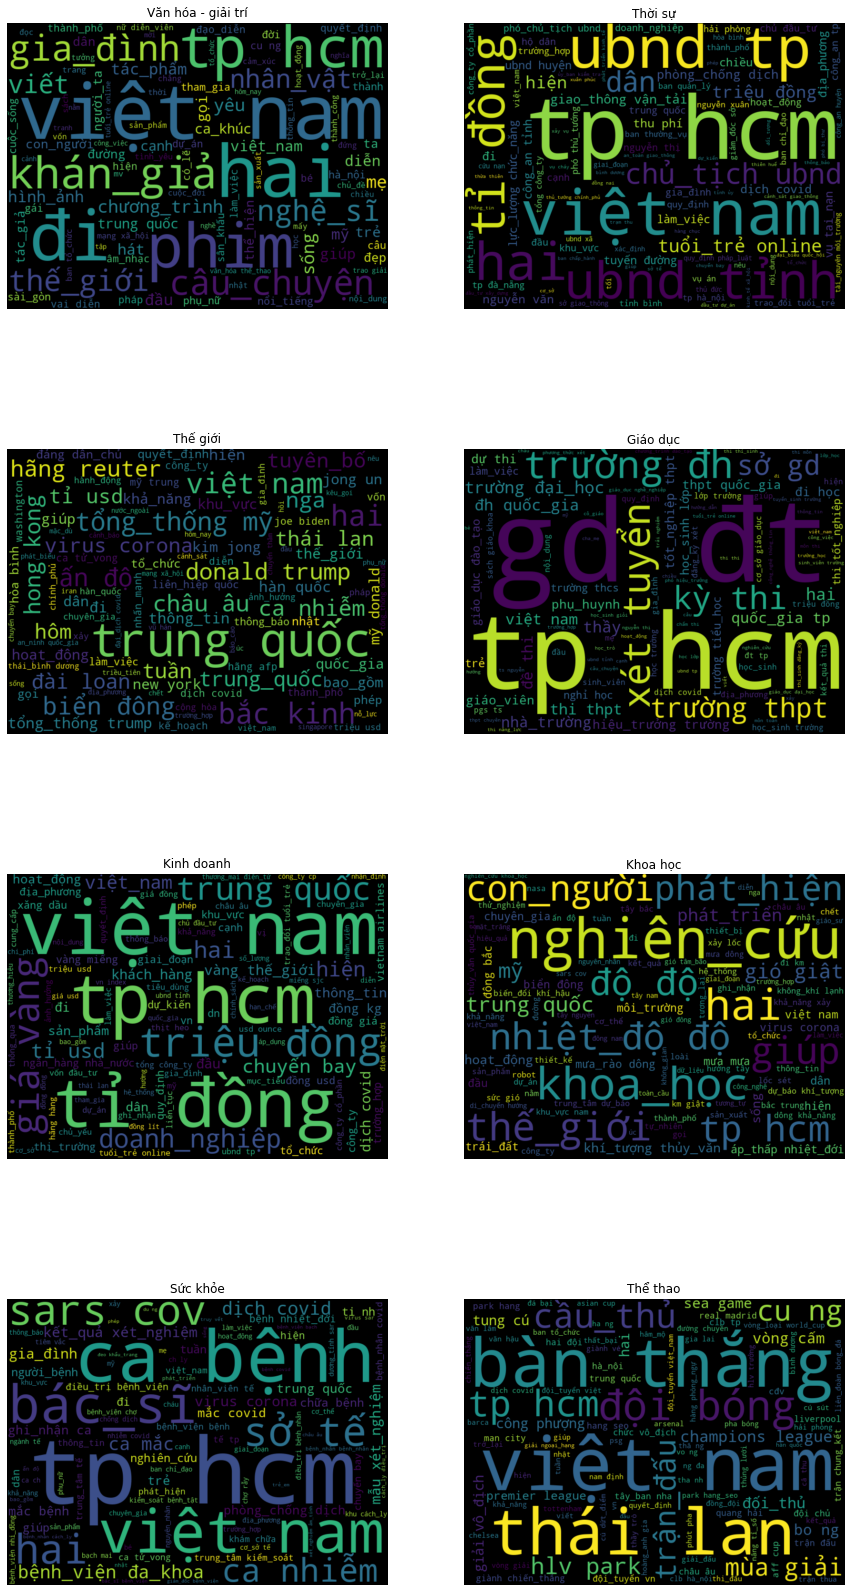

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(15, 30))
wc = WordCloud(max_words=100, width=800, height=600)

for idx, category in enumerate(selected_categories):
    plt.subplot(4, 2, idx + 1)
    wc.generate(" ".join(df.loc[df.category == category, 'text']))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(category)
    plt.axis("off")
plt.figure()

# Feature Engineering


## Load data

In [68]:
# Load the data from .pkl file

X_data = pickle.load(open('data/X_data2.pkl', 'rb'))
y_data = pickle.load(open('data/y_data2.pkl', 'rb'))

X_test = pickle.load(open('data/X_test2.pkl', 'rb'))
y_test = pickle.load(open('data/y_test2.pkl', 'rb'))

In [19]:
# Load data 2

from sklearn.model_selection import train_test_split

df = pd.read_csv('data/data2.csv')
df.drop(df[df.category == 'Công nghệ'].index, inplace=True)
df.loc[(df.category == 'Văn hóa') | (df.category == 'Giải trí'), 'category'] = 'Văn hóa - giải trí'
#lentext_count = df['text'].apply(lambda x: len(x.split()))
#df.drop(df.loc[lentext_count < 100, :].index, inplace=True)
df.reset_index(drop=True, inplace=True)
selected_categories = df['category'].unique()

print(df.shape)

X_data, X_test, y_data, y_test = train_test_split(df['text'],
                                                  df['category'],
                                                  test_size=0.2,
                                                  stratify=df['category'])


def class_split_percent(y_data, y_test, categories):
    for category in categories:
        x = len(y_data[y_data == category])
        y = len(y_test[y_test == category])
        print(f'category {category}: train_size = {x}, test_size = {y}, {y/(x+y) * 100}')


class_split_percent(y_data, y_test, selected_categories)

(99998, 3)
category Văn hóa - giải trí: train_size = 8540, test_size = 2135, 20.0
category Thời sự: train_size = 13879, test_size = 3470, 20.001152804196206
category Thế giới: train_size = 12459, test_size = 3115, 20.001284191601385
category Giáo dục: train_size = 7226, test_size = 1806, 19.995571302037202
category Kinh doanh: train_size = 9160, test_size = 2290, 20.0
category Khoa học: train_size = 2830, test_size = 707, 19.988690981057395
category Pháp luật: train_size = 9013, test_size = 2253, 19.998224747026452
category Sức khỏe: train_size = 7030, test_size = 1758, 20.004551661356395
category Thể thao: train_size = 9861, test_size = 2466, 20.00486736432222


## Feature enginering

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [5]:
class FeatureExtractor:
    @timing
    def __init__(self, data, vectorizer, *args, **kwargs):
        self.vectorizer = vectorizer(*args, **kwargs)
        self.data = data
        self.vectorizer.fit(self.data)
        print('fit data complete')
        self.svd = None
    
    @timing
    def fit_svd(self, matrix, **kwargs):
        self.svd = TruncatedSVD(**kwargs)
        self.svd.fit(matrix)
        print('fit svd complete')
    
    @timing
    def doc2vect(self, texts, svd=False):
        texts = [clean_text(text, stop_words) for text in texts]
        matrix = self.vectorizer.transform(texts)
        if svd:
            matrix = self.svd.transform(matrix)
        return matrix

In [6]:
# Bag of words
count_vect = FeatureExtractor(X_data, CountVectorizer, analyzer='word', token_pattern=r'\w{1,}', min_df=6)
X_data_count = count_vect.vectorizer.transform(X_data)
X_test_count = count_vect.vectorizer.transform(X_test)

count_vect.fit_svd(X_data_count, n_components=300, random_state=42)
X_data_count_svd = count_vect.svd.transform(X_data_count)
X_test_count_svd = count_vect.svd.transform(X_test_count)
len(count_vect.vectorizer.vocabulary_)

fit data complete
__init__ took 11.089 seconds
fit svd complete
fit_svd took 54.022 seconds


34317

In [6]:
# TF-IDF
tfidf_vect = FeatureExtractor(X_data, TfidfVectorizer, analyzer='word', max_features=30000)
X_data_tfidf = tfidf_vect.vectorizer.transform(X_data)
X_test_tfidf = tfidf_vect.vectorizer.transform(X_test)

tfidf_vect.fit_svd(X_data_tfidf, n_components=300, random_state=42)
X_data_tfidf_svd = tfidf_vect.svd.transform(X_data_tfidf)
X_test_tfidf_svd = tfidf_vect.svd.transform(X_test_tfidf)
#tfidf_vect.svd.components_

fit data complete
__init__ took 12.294 seconds
fit svd complete
fit_svd took 49.497 seconds


In [6]:
# TF-IDF with ngram
tfidf_vect_ngram = FeatureExtractor(X_data, TfidfVectorizer, analyzer='word', max_features=30000, ngram_range=(2, 3))
X_data_tfidf_ngram = tfidf_vect_ngram.vectorizer.transform(X_data)
X_test_tfidf_ngram = tfidf_vect_ngram.vectorizer.transform(X_test)

tfidf_vect_ngram.fit_svd(X_data_tfidf_ngram, n_components=300, random_state=42)
X_data_tfidf_ngram_svd = tfidf_vect_ngram.svd.transform(X_data_tfidf_ngram)
X_test_tfidf_ngram_svd = tfidf_vect_ngram.svd.transform(X_test_tfidf_ngram)

fit data complete
__init__ took 128.714 seconds
fit svd complete
fit_svd took 32.799 seconds


In [ ]:
with open-('dl_data/X_data_tf_idf_svd.pkl', 'wb') as f:
    pickle.dump(X_data_tfidf_svd, f)

with open('dl_data/X_test_tf_idf_svd.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf_svd, f)

# Training

In [7]:
# label encoder
encoder = sklearn.preprocessing.LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)

encoder.classes_

array(['Giáo dục', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe',
       'Thế giới', 'Thể thao', 'Thời sự', 'Văn hóa - giải trí'],
      dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy
import random
from collections.abc import Iterable


def measure_scores(preds, y, name='model'):
    return pd.DataFrame({
        'accuracy': [metrics.accuracy_score(y, preds)],
        'precision': [metrics.precision_score(y, preds, average="macro")],
        'recall': [metrics.recall_score(y, preds, average="macro")],
        'f1': [metrics.f1_score(y, preds, average="macro")]
    }, index=[name])


class ArticleTraining:
    statistic = pd.DataFrame({
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    })

    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
        self.X_test = X_test
        self.y_test = y_test

    def data_info(self):
        print('X_train:', self.X_train.shape)
        print('y_train:', len(self.y_train))
        print('X_val  :', self.X_val.shape)
        print('y_val  :', len(self.y_val))
        print('X_test :', self.X_test.shape)
        print('y_test :', len(self.y_test))

    @timing
    def train_neural_model(self, classifier, batch_size=512, n_epochs=5, name='model'):
        print('=========================Training=================================')
        history = classifier.fit(self.X_train, self.y_train, validation_data=(
            self.X_val, self.y_val), epochs=n_epochs, batch_size=batch_size)

        val_predictions = classifier.predict(self.X_val).argmax(axis=-1)
        test_predictions = classifier.predict(self.X_test).argmax(axis=-1)

        temp1 = measure_scores(val_predictions, self.y_val, f'{name}-val')
        temp2 = measure_scores(test_predictions, self.y_test, f'{name}-test')
        print(temp1)
        print(temp2)
        self.statistic = self.statistic.append(temp1)
        self.statistic = self.statistic.append(temp2)

        return history

    @timing
    def train_nonneral_model(self, classifier, name='model', split_trainning=None):
        if split_trainning:
            num = int(self.X_train.shape[0] / split_trainning)
            splited = [num * i for i in range(0, split_trainning)]
            splited.append(self.X_train.shape[0])
            for i in range(split_trainning):
                X = self.X_train[splited[i]: splited[i + 1]]
                y = self.y_train[splited[i]: splited[i + 1]]
                classifier.fit(X, y)
        else:
            classifier.fit(self.X_train, self.y_train)

        val_predictions = classifier.predict(self.X_val)
        test_predictions = classifier.predict(self.X_test)

        temp1 = measure_scores(val_predictions, self.y_val, f'{name}-val')
        temp2 = measure_scores(test_predictions, self.y_test, f'{name}-test')
        print(temp1)
        print(temp2)
        self.statistic = self.statistic.append(temp1)
        self.statistic = self.statistic.append(temp2)

        return classifier


class Predictor:
    def __init__(self, feature_extractor, classes):
        self.feature_extractor = feature_extractor
        self.classes = classes

    def get_class(self, label):
        if isinstance(label, str):  # labels is list string
            return label
        elif isinstance(label, Iterable):  # labels is array return from dl model prediction
            label = np.array(label).argmax(axis=-1)
        return self.classes[label]

    def get_classes(self, labels):
        labels = np.array(labels)
        if isinstance(labels[0], str):  # labels is list string
            return np.array(labels)
        elif isinstance(labels[0], Iterable):  # labels is array return from dl model prediction
            labels = labels.argmax(axis=-1)
        return np.apply_along_axis(lambda x: self.classes[x], 0, labels)

    @timing
    def predict_articles(self, clf, X, y=None, n=10, svd=False):
        if not scipy.sparse.issparse(X):
            X = np.array(X)

        # select n random choice
        if n != 'all':
            selected_idx = np.random.choice(X.shape[0], n, replace=False)
            selected_idx.sort()
            X = X[selected_idx]
        else:
            selected_idx = np.arange(X.shape[0])
        y = y if y is None else self.get_classes(y)[selected_idx]

        # prediction
        if isinstance(X[0][0], str):
            preds = clf.predict(self.feature_extractor.doc2vect(X, svd))
        else:
            preds = clf.predict(X)
            X = [f'matrix_{i}' for i in selected_idx]

        df = pd.DataFrame({
            'Article': X,
            'category': y,
            'prediction': self.get_classes(preds)
        }, index=selected_idx)
        return df.drop('category', axis=1) if y is None else df

    @timing
    def predict_article(self, clf, text=None, path=None, svd=False):
        if path is not None:
            with open(path, 'r') as f:
                text = f.readlines()
                text = ' '.join(text)

        pred = clf.predict(self.feature_extractor.doc2vect([text], svd))
        pred = self.get_class(pred[0])
        return pred

## Nonneural model

In [9]:
training = ArticleTraining(X_data_tfidf, X_test_tfidf, y_data_n, y_test_n)
training_svd = ArticleTraining(X_data_tfidf_svd, X_test_tfidf_svd, y_data_n, y_test_n)

print('===Training data info===')
training.data_info()
print('===Training data svd info===')
training_svd.data_info()

X_mini_test = X_test[:1000]
y_mini_test = y_test[:1000]

predictor = Predictor(tfidf_vect, encoder.classes_)

===Training data info===
X_train: (71998, 30000)
y_train: 71998
X_val  : (8000, 30000)
y_val  : 8000
X_test : (20000, 30000)
y_test : 20000
===Training data svd info===
X_train: (71998, 300)
y_train: 71998
X_val  : (8000, 300)
y_val  : 8000
X_test : (20000, 300)
y_test : 20000


### Naive Bayes

In [12]:
from sklearn import naive_bayes

naive_bayes_clf = naive_bayes.BernoulliNB()
naive_bayes_clf = training_svd.train_nonneral_model(naive_bayes_clf, 'naive_bayes')

                 accuracy  precision    recall        f1
naive_bayes-val     0.721   0.729224  0.712862  0.718709
                  accuracy  precision    recall        f1
naive_bayes-test     0.725   0.728747  0.714469  0.719534
train_nonneral_model took 0.714 seconds


In [11]:
predictor.predict_articles(naive_bayes_clf, X_mini_test, y_mini_test, n='all', svd=True)

doc2vect took 9.399 seconds
predict_articles took 9.409 seconds


,Article,category,prediction
0,dịch phát_hiện_tại huyện tân_hiệp kiên_giang đ...,Kinh doanh,Thời sự
1,trốn truy_nã nguyễn văn phúc võ văn hiền công_...,Pháp luật,Pháp luật
2,lễ_hội đường_phố carnaval hạ_long nâng tầm thà...,Văn hóa - giải trí,Văn hóa - giải trí
3,thanh_tra ubnd tân bình tp hcm kết_luận sai_ph...,Giáo dục,Giáo dục
4,trưởng đặc_khu hong kong lâm trịnh nguyệt nga ...,Thế giới,Thế giới
...,...,...,...
995,thế_giới có_lẽ khả_năng vắcxin phòng covid tức...,Khoa học,Khoa học
996,nhật mở_cửa lao đô ng nhập_cư nô lư gia quyê v...,Thế giới,Thế giới
997,can_thiệp quan_hệ ấn độ trung quốc nga tiếp_cậ...,Thế giới,Thế giới
998,tơ daily mail ca ch va nga ban tô chư premier ...,Thể thao,Giáo dục


In [12]:
training_svd.statistic

,accuracy,precision,recall,f1
naive_bayes-val,0.735875,0.73686,0.725151,0.729593
naive_bayes-test,0.726450,0.72843,0.715831,0.720600


### XGBoost

In [10]:
import xgboost

xgboost_model = xgboost.XGBClassifier(use_label_encoder=False)
xgboost_model = training_svd.train_nonneral_model(xgboost_model, 'xgboost')

[06:19:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
             accuracy  precision    recall        f1
xgboost-val   0.85375   0.851626  0.844393  0.847364
              accuracy  precision   recall        f1
xgboost-test   0.85515   0.851147  0.84629  0.848341
train_nonneral_model took 1669.929 seconds


In [11]:
predictor.predict_articles(xgboost_model, X_mini_test, y_mini_test, n='all', svd=True)

doc2vect took 9.998 seconds
predict_articles took 10.007 seconds


,Article,category,prediction
0,vay vơ la suâ tha ng nơ co kha năng toa cung đ...,Pháp luật,Pháp luật
1,chiều địa_phương giải bóng_đá tình football fo...,Thể thao,Thể thao
2,cơ_quan hàng vũ_trụ mỹ nasa tuyên_bố tiền công...,Khoa học,Khoa học
3,tế thông_báo bệnh_nhân covid bệnh_nhân đi chuy...,Sức khỏe,Sức khỏe
4,chỉ_huy bộ_đội biên_phòng tỉnh thanh_hóa phối_...,Thời sự,Thời sự
...,...,...,...
995,cháy rừng nghiêm_trọng miền trung mùa nóng nắn...,Thời sự,Thời sự
996,tuổi_trẻ nguyên giám_đốc bùi thị lệ phi giám_đ...,Pháp luật,Pháp luật
997,giành danh_hiệu cầu_thủ xuất_sắc giải bóng_đá ...,Thể thao,Thể thao
998,xe cảnh_sát ép xe tự_hành lề trường_hợp phát_h...,Thế giới,Thế giới


In [12]:
training_svd.statistic

,accuracy,precision,recall,f1
xgboost-val,0.85375,0.851626,0.844393,0.847364
xgboost-test,0.85515,0.851147,0.846290,0.848341


### Logistic regression

In [13]:
from sklearn import linear_model

linear_model = linear_model.LogisticRegression()
linear_model = training_svd.train_nonneral_model(linear_model, 'logisticRegression')

                        accuracy  precision    recall        f1
logisticRegression-val   0.85875   0.857183  0.849359  0.852867
                         accuracy  precision    recall        f1
logisticRegression-test    0.8508   0.847037  0.840353  0.843408
train_nonneral_model took 28.51 seconds


/home/long/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
predictor.predict_articles(linear_model, X_mini_test, y_mini_test, n='all', svd=True)

doc2vect took 10.027 seconds
predict_articles took 10.03 seconds


,Article,category,prediction
0,vay vơ la suâ tha ng nơ co kha năng toa cung đ...,Pháp luật,Pháp luật
1,chiều địa_phương giải bóng_đá tình football fo...,Thể thao,Thể thao
2,cơ_quan hàng vũ_trụ mỹ nasa tuyên_bố tiền công...,Khoa học,Khoa học
3,tế thông_báo bệnh_nhân covid bệnh_nhân đi chuy...,Sức khỏe,Sức khỏe
4,chỉ_huy bộ_đội biên_phòng tỉnh thanh_hóa phối_...,Thời sự,Thời sự
...,...,...,...
995,cháy rừng nghiêm_trọng miền trung mùa nóng nắn...,Thời sự,Thời sự
996,tuổi_trẻ nguyên giám_đốc bùi thị lệ phi giám_đ...,Pháp luật,Pháp luật
997,giành danh_hiệu cầu_thủ xuất_sắc giải bóng_đá ...,Thể thao,Thể thao
998,xe cảnh_sát ép xe tự_hành lề trường_hợp phát_h...,Thế giới,Thế giới


In [15]:
training_svd.statistic

,accuracy,precision,recall,f1
xgboost-val,0.85375,0.851626,0.844393,0.847364
xgboost-test,0.85515,0.851147,0.846290,0.848341
logisticRegression-val,0.85875,0.857183,0.849359,0.852867
logisticRegression-test,0.85080,0.847037,0.840353,0.843408


### Random forest

In [16]:
from sklearn import ensemble

rf_model = ensemble.RandomForestClassifier()
training_svd.train_nonneral_model(rf_model, 'Random Forest')

                   accuracy  precision    recall        f1
Random Forest-val   0.84025   0.842908  0.826341  0.832611
                    accuracy  precision    recall        f1
Random Forest-test    0.8419   0.841669  0.827388  0.832995
train_nonneral_model took 175.714 seconds


RandomForestClassifier()

In [17]:
predictor.predict_articles(rf_model, X_mini_test, y_mini_test, n='all', svd=True)

doc2vect took 12.25 seconds
predict_articles took 12.307 seconds


,Article,category,prediction
0,vay vơ la suâ tha ng nơ co kha năng toa cung đ...,Pháp luật,Pháp luật
1,chiều địa_phương giải bóng_đá tình football fo...,Thể thao,Thể thao
2,cơ_quan hàng vũ_trụ mỹ nasa tuyên_bố tiền công...,Khoa học,Khoa học
3,tế thông_báo bệnh_nhân covid bệnh_nhân đi chuy...,Sức khỏe,Sức khỏe
4,chỉ_huy bộ_đội biên_phòng tỉnh thanh_hóa phối_...,Thời sự,Thời sự
...,...,...,...
995,cháy rừng nghiêm_trọng miền trung mùa nóng nắn...,Thời sự,Thời sự
996,tuổi_trẻ nguyên giám_đốc bùi thị lệ phi giám_đ...,Pháp luật,Pháp luật
997,giành danh_hiệu cầu_thủ xuất_sắc giải bóng_đá ...,Thể thao,Thể thao
998,xe cảnh_sát ép xe tự_hành lề trường_hợp phát_h...,Thế giới,Thời sự


In [18]:
training_svd.statistic

,accuracy,precision,recall,f1
xgboost-val,0.85375,0.851626,0.844393,0.847364
xgboost-test,0.85515,0.851147,0.846290,0.848341
logisticRegression-val,0.85875,0.857183,0.849359,0.852867
logisticRegression-test,0.85080,0.847037,0.840353,0.843408
Random Forest-val,0.84025,0.842908,0.826341,0.832611
Random Forest-test,0.84190,0.841669,0.827388,0.832995


In [22]:
MODEL_DIR = 'trained_model/bag-of-words-min_df_6/'
with open(MODEL_DIR + 'naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(naive_bayes_clf, f)
with open(MODEL_DIR + 'xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgboost_model, f)
with open(MODEL_DIR + 'linear_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)
with open(MODEL_DIR + 'random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

## Neural model

In [23]:
import keras
from keras.layers import Dense, LSTM, Input, Reshape, Bidirectional, GRU, Flatten, Convolution1D


def create_lstm_model():
    input_layer = Input(shape=(300,))

    layer = Reshape((10, 30))(input_layer)
    layer = LSTM(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)

    output_layer = Dense(11, activation='softmax')(layer)

    classifier = keras.models.Model(input_layer, output_layer)

    classifier.compile(optimizer=keras.optimizers.Adam(
    ), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier


def create_rcnn_model():
    input_layer = Input(shape=(300,))

    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(
        GRU(128, activation='relu', return_sequences=True))(layer)
    layer = Convolution1D(100, 3, activation="relu")(layer)
    layer = Flatten()(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)

    output_layer = Dense(11, activation='softmax')(layer)

    classifier = keras.models.Model(input_layer, output_layer)

    classifier.compile(optimizer=keras.optimizers.Adam(
    ), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier

def plot_learning_curve(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Using TensorFlow backend.


### LSTM

In [24]:
lstm_model = create_lstm_model()
print(lstm_model.summary())
history = training_svd.train_neural_model(lstm_model, name="LSTM")
lstm_model.save(MODEL_DIR + 'lstm_model.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               81408     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 11)                1419

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


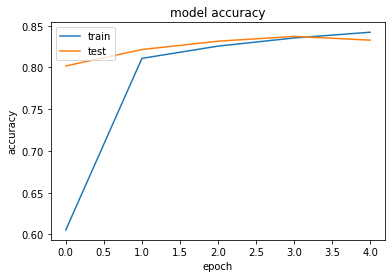

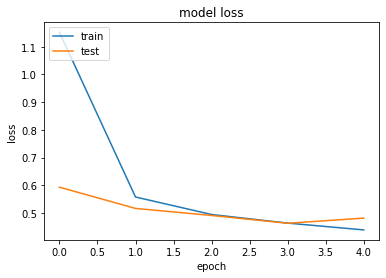

In [25]:
plot_learning_curve(history)

In [26]:
#lstm_model = keras.models.load_model('trained_model/lstm_model.h5')

In [27]:
predictor.predict_articles(lstm_model, X_mini_test, y_mini_test, n='all', svd=True)

doc2vect took 8.818 seconds
predict_articles took 9.097 seconds


,Article,category,prediction
0,dịch phát_hiện_tại huyện tân_hiệp kiên_giang đ...,Kinh doanh,Kinh doanh
1,trốn truy_nã nguyễn văn phúc võ văn hiền công_...,Pháp luật,Pháp luật
2,lễ_hội đường_phố carnaval hạ_long nâng tầm thà...,Văn hóa - giải trí,Văn hóa - giải trí
3,thanh_tra ubnd tân bình tp hcm kết_luận sai_ph...,Giáo dục,Giáo dục
4,trưởng đặc_khu hong kong lâm trịnh nguyệt nga ...,Thế giới,Thế giới
...,...,...,...
995,thế_giới có_lẽ khả_năng vắcxin phòng covid tức...,Khoa học,Khoa học
996,nhật mở_cửa lao đô ng nhập_cư nô lư gia quyê v...,Thế giới,Thế giới
997,can_thiệp quan_hệ ấn độ trung quốc nga tiếp_cậ...,Thế giới,Thế giới
998,tơ daily mail ca ch va nga ban tô chư premier ...,Thể thao,Thể thao


In [28]:
training_svd.statistic

,accuracy,precision,recall,f1
naive_bayes-val,0.735875,0.736860,0.725151,0.729593
naive_bayes-test,0.726450,0.728430,0.715831,0.720600
LSTM-val,0.832750,0.816841,0.834849,0.823804
LSTM-test,0.829800,0.813525,0.831703,0.820369


### RCNN

In [29]:
rcnn_model = create_rcnn_model()
print(rcnn_model.summary())
history2 = training_svd.train_neural_model(rcnn_model, name='rcnn')
rcnn_model.save(MODEL_DIR + 'rcnn_model.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 10, 30)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 256)           122112    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 100)            76900     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2626

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


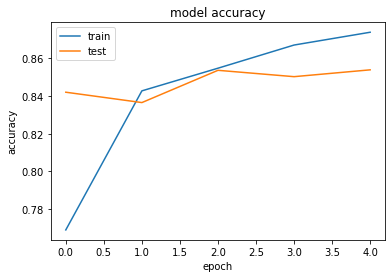

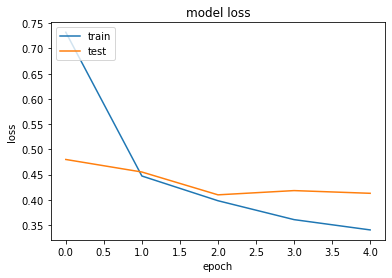

In [30]:
plot_learning_curve(history2)

In [31]:
#rcnn_model = keras.models.load_model('dl_data/rcnn_model.h5')

In [32]:
predictor.predict_articles(rcnn_model, X_mini_test, y_mini_test, n='all', svd=True)

doc2vect took 8.774 seconds
predict_articles took 9.739 seconds


,Article,category,prediction
0,dịch phát_hiện_tại huyện tân_hiệp kiên_giang đ...,Kinh doanh,Thời sự
1,trốn truy_nã nguyễn văn phúc võ văn hiền công_...,Pháp luật,Pháp luật
2,lễ_hội đường_phố carnaval hạ_long nâng tầm thà...,Văn hóa - giải trí,Văn hóa - giải trí
3,thanh_tra ubnd tân bình tp hcm kết_luận sai_ph...,Giáo dục,Giáo dục
4,trưởng đặc_khu hong kong lâm trịnh nguyệt nga ...,Thế giới,Thế giới
...,...,...,...
995,thế_giới có_lẽ khả_năng vắcxin phòng covid tức...,Khoa học,Khoa học
996,nhật mở_cửa lao đô ng nhập_cư nô lư gia quyê v...,Thế giới,Thế giới
997,can_thiệp quan_hệ ấn độ trung quốc nga tiếp_cậ...,Thế giới,Thế giới
998,tơ daily mail ca ch va nga ban tô chư premier ...,Thể thao,Thể thao


In [33]:
statistics = pd.concat((training.statistic, training_svd.statistic), axis=0)
statistics

,accuracy,precision,recall,f1
xgboost-val,0.856250,0.854112,0.844319,0.848444
xgboost-test,0.856450,0.854315,0.845690,0.849405
logisticRegression-val,0.832750,0.828452,0.823496,0.825851
logisticRegression-test,0.832700,0.828988,0.824989,0.826916
Random Forest-val,0.845500,0.851095,0.823800,0.832986
Random Forest-test,0.841400,0.845326,0.818704,0.827329
naive_bayes-val,0.735875,0.736860,0.725151,0.729593
naive_bayes-test,0.726450,0.728430,0.715831,0.720600
LSTM-val,0.832750,0.816841,0.834849,0.823804
LSTM-test,0.829800,0.813525,0.831703,0.820369


In [34]:
statistics.to_csv(MODEL_DIR + 'statistic.csv', index=True)

In [35]:
predictor.predict_article(rcnn_model, path='data/test.txt', svd=True)

doc2vect took 0.088 seconds
predict_article took 0.133 seconds


'Thế giới'